In [22]:
import ROOT
from ROOT import TFile, TCanvas, TH1D, TF1, gStyle
import numpy as np

In [23]:
# Open the file
file = TFile.Open("data/Inv_mass_gghasOneL_DNN_HL.root")
# file.ls()

In [24]:
## Get histograms

Continuum_Bkg = file.Get("Continuum_Bkg"); # TH1
GGHH = file.Get("GGHH");
GGH  = file.Get("GGH");
VBFH = file.Get("VBFH");
VH   = file.Get("VH");
ttH  = file.Get("ttH");
tHq  = file.Get("tHq");
data_obs = file.Get("data_obs")

# define full bkg. histogram
hSH = TH1D("hSH", "Single H Bkg.", 80, 100, 180)
hSH.Add(GGH)
hSH.Add(VBFH)
hSH.Add(VH)
hSH.Add(ttH)
hSH.Add(tHq)

hFB = TH1D("hFB", "Full Bkg.", 80, 100, 180)
hFB.Add(hSH, Continuum_Bkg)

hSB = TH1D("hSB", "Signal + Bkg.", 80, 100, 180)
hSB.Add(hFB, GGHH)

True

In [25]:
# Create canvas with pads for main plot and data/MC ratio
c = ROOT.TCanvas("c", "", 700, 750)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [26]:
upper_pad = ROOT.TPad("upper_pad", "", 0, 0.35, 1, 1)
lower_pad = ROOT.TPad("lower_pad", "", 0, 0, 1, 0.35)
for p in [upper_pad, lower_pad]:
    p.SetLeftMargin(0.14)
    p.SetRightMargin(0.05)
    p.SetTickx(False)
    p.SetTicky(False)
upper_pad.SetBottomMargin(0)
lower_pad.SetTopMargin(0)
lower_pad.SetBottomMargin(0.3)
 
upper_pad.Draw()
lower_pad.Draw()

In [27]:
# Fit signal + background model to data
fit = ROOT.TF1("fit", "expo+[2]*exp(-0.5*((x-[3])/[4])^2)", 100, 180)
fit.FixParameter(3, 125.0)
fit.FixParameter(2, 119.1)
fit.FixParameter(4, 2.39)
fit.SetLineColor(2)
fit.SetLineStyle(1)
fit.SetLineWidth(2)
hSB.Fit("fit", "0 S WL", "", 100, 180)

# fit single H
fit2 = ROOT.TF1("fit2", "expo+[2]*exp(-0.5*((x-[3])/[4])^2)", 100, 180)
fit2.FixParameter(3, 125.0)
fit2.FixParameter(2, 119.1)
fit2.FixParameter(4, 2.39)
fit2.SetLineColor(8)
fit2.SetLineStyle(1)
fit2.SetLineWidth(2)
hFB.Fit("fit2", "0 S WL", "", 100, 180)


****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      6489.32
Chi2                      =      186.829
NDf                       =           78
Edm                       =  4.52292e-09
NCalls                    =           91
p0                        =      11.4747   +/-   0.12593     
p1                        =   -0.0253824   +/-   0.000959427 
p2                        =        119.1                      	 (fixed)
p3                        =          125                      	 (fixed)
p4                        =         2.39                      	 (fixed)

****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      6489.48
Chi2                      =      186.829
NDf                       =           78
Edm                       =  4.50795e-09
NCalls                    =           91
p0                        =      11.4746   +/-   0.12593     
p1                        =   -0.0253824   +/-

In [28]:
# Draw pseudo-data
upper_pad.cd()

hPD = TH1D("hPD", "Pseudo data", 20, 100, 180)

for i in range(int(hSB.Integral()/4)):
    hPD.Fill(fit.GetRandom());

for h in [hPD]:
    h.SetMarkerStyle(20)
    h.SetMarkerSize(1.2)
    h.SetLineWidth(2)
    h.SetLineColor(ROOT.kBlack)
    h.SetMinimum(1e-3)
    h.SetMaximum(8e3)
    h.GetYaxis().SetLabelSize(0.045)
    h.GetYaxis().SetTitleSize(0.05)
    h.SetStats(0)
    h.SetTitle("")
    h.Draw("E")

In [29]:
# Draw fit
fit2.Draw("SAME")
fit.Draw("SAME")

In [30]:
# Draw background
bkg = ROOT.TF1("bkg", "expo", 100, 180)
for i in range(4):
    bkg.SetParameter(i, fit.GetParameter(i))
bkg.SetLineColor(4)
bkg.SetLineStyle(2)
bkg.SetLineWidth(2)
bkg.Draw("SAME")

In [31]:
# Should we scale the signal by luminosity and weight?
#dihiggs = GGHH.Clone()
GGHH.Scale(1000)
GGHH.Draw("HIST SAME")

In [32]:
# Draw ratio
lower_pad.cd()

In [33]:
ratiobkg = ROOT.TH1I("zero", "", 80, 100, 180)
ratiobkg.SetStats(0)
ratiobkg.SetLineColor(4)
ratiobkg.SetLineStyle(2)
ratiobkg.SetLineWidth(2)
ratiobkg.SetMinimum(-125)
ratiobkg.SetMaximum(250)
ratiobkg.GetXaxis().SetLabelSize(0.08)
ratiobkg.GetXaxis().SetTitleSize(0.12)
ratiobkg.GetXaxis().SetTitleOffset(1.0)
ratiobkg.GetYaxis().SetLabelSize(0.08)
ratiobkg.GetYaxis().SetTitleSize(0.09)
ratiobkg.GetYaxis().SetTitle("Data - Bkg.")
ratiobkg.GetYaxis().CenterTitle()
ratiobkg.GetYaxis().SetTitleOffset(0.7)
ratiobkg.GetYaxis().SetNdivisions(503, False)
ratiobkg.GetYaxis().ChangeLabel(-1, -1, 0)
ratiobkg.GetXaxis().SetTitle("m_{#gamma#gamma} [GeV]")
ratiobkg.Draw("AXIS")

In [34]:
ratiores = ROOT.TH1F("ratiores", "ratiores", 5000, 100, 180)
ratiores.Eval(fit2)
ratiores.SetLineColor(8)
ratiores.SetLineStyle(1)
ratiores.SetLineWidth(2)
ratiores.Add(bkg, -1)
ratiores.Draw("SAME")

ratiosig = ROOT.TH1F("ratiosig", "ratiosig", 5000, 100, 180)
ratiosig.Eval(fit)
ratiosig.SetLineColor(2)
ratiosig.SetLineStyle(1)
ratiosig.SetLineWidth(2)
ratiosig.Add(bkg, -1)
ratiosig.Draw("SAME")

In [35]:
ratiodata = hPD.Clone()
ratiodata.Add(bkg, -1)
for i in range(1, hPD.GetNbinsX()):
    ratiodata.SetBinError(i, hPD.GetBinError(i))
ratiodata.Draw("E SAME")

In [36]:
# Add legend
upper_pad.cd()
legend = ROOT.TLegend(0.65, 0.55, 0.99, 0.85)
legend.SetTextFont(42)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextSize(0.05)
legend.SetTextAlign(32)
legend.AddEntry(hPD, "Pseudo-data" ,"lep")
legend.AddEntry(bkg, "Non-resonant Bkg.", "l")
legend.AddEntry(fit, "Signal + Full Bkg.", "l")
legend.AddEntry(fit2, "Full bkg.", "l")
legend.AddEntry(GGHH, "Signal x 1000", "l")
legend.Draw()

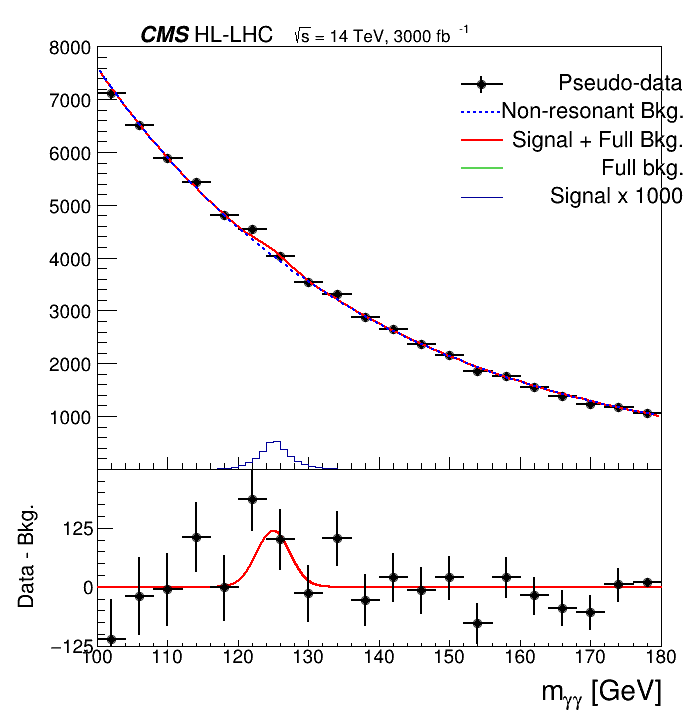

In [37]:
# Add CMS label
text = ROOT.TLatex()
text.SetNDC()
text.SetTextFont(72)
text.SetTextSize(0.05)
text.DrawLatex(0.2, 0.91, "CMS")
text.SetTextFont(42)
text.DrawLatex(0.2 + 0.08, 0.91, "HL-LHC")
text.SetTextSize(0.04)
text.DrawLatex(0.42, 0.91, "#sqrt{s} = 14 TeV, 3000 fb^{-1}")
%jsroot off
c.Draw()

In [38]:
c.SaveAs("postfit.png")

Info in <TCanvas::Print>: png file postfit.png has been created
